<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Equação-de-Sellmeier" data-toc-modified-id="Equação-de-Sellmeier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Equação de Sellmeier</a></span></li><li><span><a href="#Funções-de-Bessel" data-toc-modified-id="Funções-de-Bessel-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Funções de Bessel</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Função-de-Bessel-de-primeira-espécie---$J_m(x)$" data-toc-modified-id="Função-de-Bessel-de-primeira-espécie---$J_m(x)$-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Função de Bessel de primeira espécie - $J_m(x)$</a></span></li><li><span><a href="#Função-de-Bessel-de-segunda-espécie---$Y_m(x)$" data-toc-modified-id="Função-de-Bessel-de-segunda-espécie---$Y_m(x)$-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Função de Bessel de segunda espécie - $Y_m(x)$</a></span></li><li><span><a href="#Função-de-Bessel-modificada-de-primeira-espécie---$I_m(x)$" data-toc-modified-id="Função-de-Bessel-modificada-de-primeira-espécie---$I_m(x)$-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Função de Bessel modificada de primeira espécie - $I_m(x)$</a></span></li><li><span><a href="#Função-de-Bessel-modificada-de-segunda-espécie---$K_m(x)$" data-toc-modified-id="Função-de-Bessel-modificada-de-segunda-espécie---$K_m(x)$-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Função de Bessel modificada de segunda espécie - $K_m(x)$</a></span></li></ul></li></ul></li><li><span><a href="#Equação-característica" data-toc-modified-id="Equação-característica-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Equação característica</a></span><ul class="toc-item"><li><span><a href="#Solução-da-equação-característica" data-toc-modified-id="Solução-da-equação-característica-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Solução da equação característica</a></span><ul class="toc-item"><li><span><a href="#Intensidade-de-campo" data-toc-modified-id="Intensidade-de-campo-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Intensidade de campo</a></span></li></ul></li><li><span><a href="#Spot-size" data-toc-modified-id="Spot-size-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Spot size</a></span></li></ul></li></ul></div>

In [1]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import scipy.special as sp
from  scipy.constants import c
import matplotlib.pyplot as plt
from utils.dsp import firFilter, pulseShape, eyediagram, lowPassFIR
from commpy.utilities  import signal_power, upsample
from utils.models import mzm

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Equação de Sellmeier

A equação Sellmeier descreve o índice de refração de um material em função da frequência angular:
\begin{equation}
n^2\left( \omega \right) = 1 + \sum_{j = 1}^m
\frac{B_j \omega_j^2}{\omega_j^2 - \omega^2},
\end{equation}
em que $\omega_j$ é a frequência de ressonância e $B_j$ o coeficiente da $j$-éssima frequência de ressonância. Para a sílica, estes parâmetros são:

In [4]:
Bj = np.array([0.6961663, 0.4079426, 0.8974794])
lmbdj = np.array([0.0684043e-6, 0.1162414e-6, 9.8961610e-6])

em que $\lambda_j = 2\pi c \backslash \omega_j$. 

In [5]:
lmbd_max = 1.6e-6
lmbd_min = 1.5e-6
lmbd = np.linspace(lmbd_min, lmbd_max, 1000)
n = 1
for i in range(3):
  n = n + (Bj[i]*lmbd**2)/(lmbd**2 - lmbdj[i]**2)

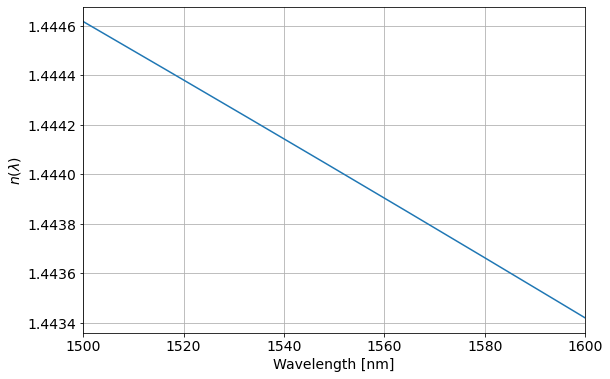

In [6]:
plt.figure(figsize=(9,6))
plt.plot(1e9*lmbd, np.sqrt(n))
plt.xlabel('Wavelength [nm]')
plt.ylabel(r'$n\left( \lambda \right)$')
plt.xlim([1e9*lmbd_min, 1e9*lmbd_max])
plt.grid(True)

# Funções de Bessel

### Função de Bessel de primeira espécie - $J_m(x)$

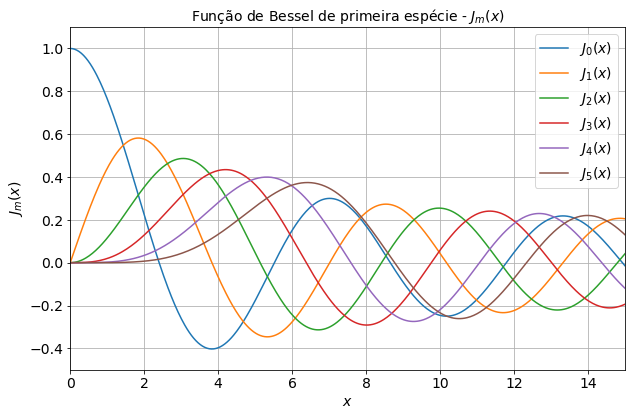

In [7]:
plt.figure(figsize=(9,6))
x = np.linspace(0, 15, 500)

for v in range(0, 6):
  plt.plot(x, sp.jv(v, x))
  
plt.xlim((0, 15))
plt.ylim((-0.5, 1.1))
plt.legend((r'${J}_0(x)$', r'${J}_1(x)$', r'${J}_2(x)$', 
            r'${J}_3(x)$', r'${J}_4(x)$', r'${J}_5(x)$'), loc = 0)
plt.xlabel(r'$x$')
plt.ylabel(r'${J}_m(x)$')
plt.title(r'Função de Bessel de primeira espécie - ${J}_m(x)$')
plt.grid(True)
plt.tight_layout()

### Função de Bessel de segunda espécie - $Y_m(x)$

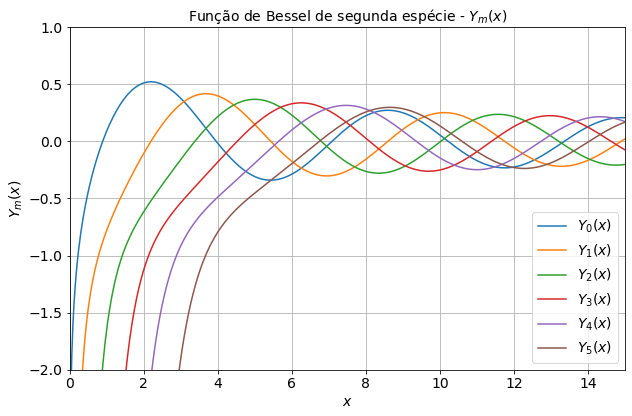

In [8]:
plt.figure(figsize=(9,6))
for v in range(0, 6):
  plt.plot(x, sp.yv(v, x))
  
plt.xlim((0, 15))
plt.ylim((-0.5, 1.1))
plt.legend((r'${Y}_0(x)$', r'${Y}_1(x)$', r'${Y}_2(x)$', 
            r'${Y}_3(x)$', r'${Y}_4(x)$', r'${Y}_5(x)$'), loc = 0)
plt.xlabel(r'$x$')
plt.ylabel(r'${Y}_m(x)$')
plt.title(r'Função de Bessel de segunda espécie - ${Y}_m(x)$')
plt.ylim([-2.0,1.0])
plt.grid(True)
plt.tight_layout()

### Função de Bessel modificada de primeira espécie - $I_m(x)$

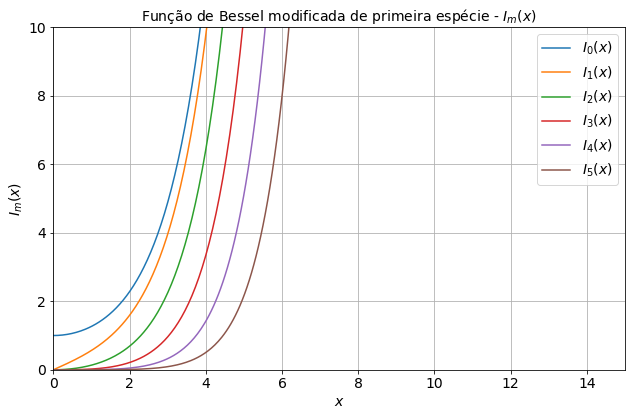

In [9]:
plt.figure(figsize=(9,6))
for v in range(0, 6):
  plt.plot(x, sp.iv(v, x))
  
plt.xlim((0, 15))
plt.ylim((-0.5, 1.1))
plt.legend((r'${I}_0(x)$', r'${I}_1(x)$', r'${I}_2(x)$', 
            r'${I}_3(x)$', r'${I}_4(x)$', r'${I}_5(x)$'), loc = 0)
plt.xlabel(r'$x$')
plt.ylabel(r'${I}_m(x)$')
plt.title(r'Função de Bessel modificada de primeira espécie - ${I}_m(x)$')
plt.ylim([0.0,10.0])
plt.grid(True)
plt.tight_layout()

### Função de Bessel modificada de segunda espécie - $K_m(x)$

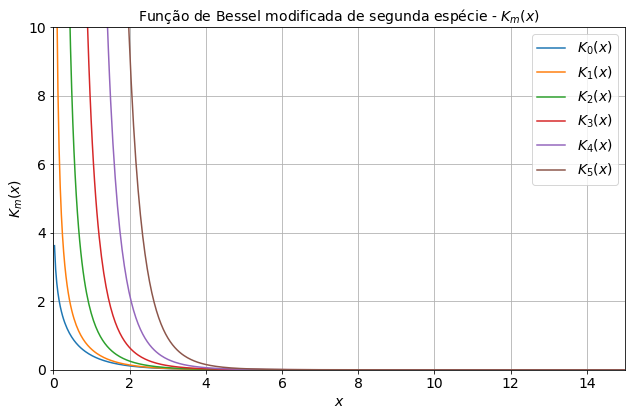

In [10]:
plt.figure(figsize=(9,6))
for v in range(0, 6):
  plt.plot(x, sp.kv(v, x))
  
plt.xlim((0, 15))
plt.ylim((-0.5, 1.1))
plt.legend((r'${K}_0(x)$', r'${K}_1(x)$', r'${K}_2(x)$', 
            r'${K}_3(x)$', r'${K}_4(x)$', r'${K}_5(x)$'), loc = 0)
plt.xlabel(r'$x$')
plt.ylabel(r'${K}_m(x)$')
plt.title(r'Função de Bessel modificada de segunda espécie - ${K}_m(x)$')
plt.ylim([0.0,10.0])
plt.grid(True)
plt.tight_layout()

# Equação característica

A equação característica da fibra óptica é:
\begin{equation}
\left[ \frac{J'_m\left( p a \right)}{pJ_m\left( p a \right)} + \frac{K'_m\left( q a \right)}{q K_m\left( q a \right)} \right]\left[ \frac{J'_m\left( p a \right)}{pJ_m\left( p a \right)} + \frac{n_2^2}{n_1^2} \frac{K'_m\left( q a \right)}{q K_m\left( q a \right)} \right] = \left( \frac{m}{a} \right)^2 \left( \frac{1}{p^2} + \frac{1}{q^2} \right)\left( \frac{1}{p^2} + \frac{n_2^2}{n_1^2} \frac{1}{q^2} \right),
\end{equation}
em que $a$ é o raio do núcleo da fibra e $m$ a ordem da função de Bessel.

In [11]:
a    = 4.5e-6                # raio do núcleo da fibra
n1   = 1.448918              # índice do núcleo 
n2   = 1.444418              # índice da casca
NA   = np.sqrt(n1**2-n2**2)  # abertura numérica
lmbd = 1550e-9               # comprimento de onda de operação
k0   = 2*np.pi/lmbd          # número de onda no espaço livre
V    = a*k0*NA               # frequência de operação normalizada
print("(n2/n1)^2 = %4.3f" % ((n2/n1)**2))
print("V = %4.2f" %(V))

(n2/n1)^2 = 0.994
V = 2.08


In [12]:
V_cutoff = 2.405
a_cutoff = V_cutoff/(k0*NA)
print('Raio [m] máximo para condição monomodo: %3.2e' %(a_cutoff))

Raio [m] máximo para condição monomodo: 5.20e-06


In [13]:
lmbd_cutoff = (a*NA*2*np.pi)/V_cutoff
print('Comprimento de onda [m] mínimo para condição monomodo: %4.3e' %(lmbd_cutoff))

Comprimento de onda [m] mínimo para condição monomodo: 1.341e-06


É importante lembrar que os parâmetros $p$ e $q$ são definidos por:
\begin{align}
p^2 &= \left( n_1k_0 \right)^2 - \beta^2, \\
-q^2 &= \left( n_2k_0 \right)^2 - \beta^2.
\end{align}

Outro fato importante que deve ser lembrado é que a constante de propagação $\beta = n_{eff}k_0$, em que $n_{eff}$ é o índice de refração efetivo que varia entre $n_2$ e $n_1$. Logo:

In [14]:
neff = np.linspace(n2*1.00001, n1*0.99999, 1000)
beta = neff*k0
p = np.sqrt((n1*k0)**2-beta**2)
q = np.sqrt(beta**2-(n2*k0)**2)

## Solução da equação característica

A equação característica pode então ser determinada, dividindo-a em três partes: \begin{equation}
\underbrace{\left[ \frac{J'_m\left( p a \right)}{pJ_m\left( p a \right)} + \frac{K'_m\left( q a \right)}{q K_m\left( q a \right)} \right]}_{LHS_1} \quad \underbrace{\left[ \frac{J'_m\left( p a \right)}{pJ_m\left( p a \right)} + \frac{n_2^2}{n_1^2} \frac{K'_m\left( q a \right)}{q K_m\left( q a \right)} \right]}_{LHS_2} = \underbrace{\left( \frac{m}{a} \right)^2 \left( \frac{1}{p^2} + \frac{1}{q^2} \right)\left( \frac{1}{p^2} + \frac{n_2^2}{n_1^2} \frac{1}{q^2} \right)}_{RHS},
\end{equation}

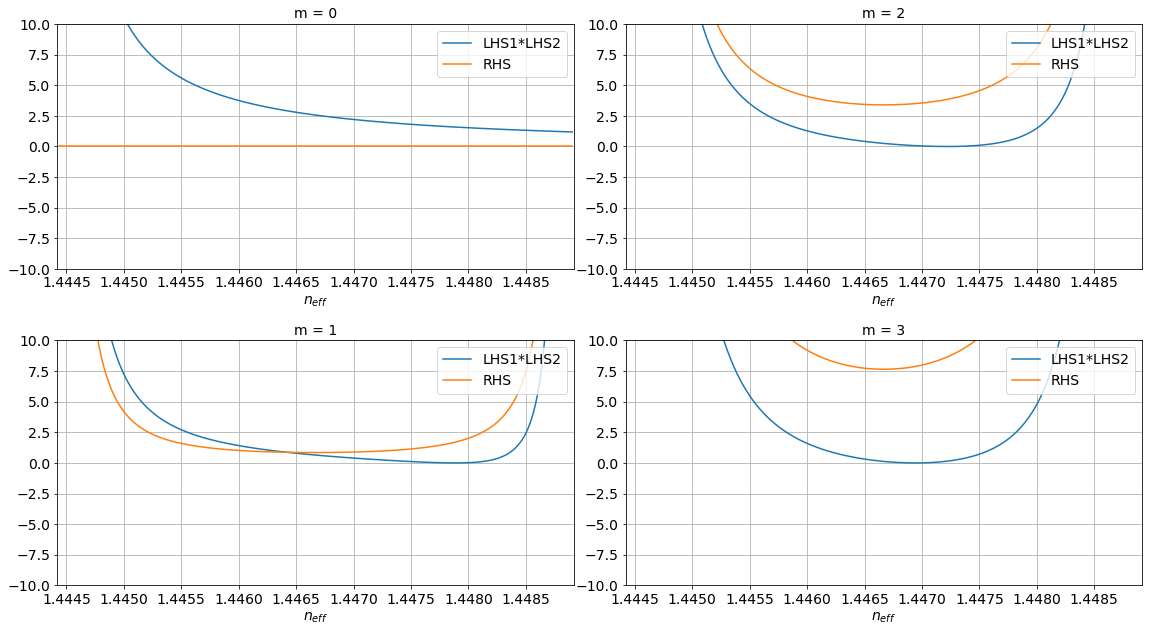

In [15]:
fc = (n2/n1)**2
fig, ax = plt.subplots(2,2,figsize=(16,9))
for m in range(4): 
  # Cálculo das funções
  LHS1 = 1/a*(sp.jvp(m, p*a)/(p*sp.jv(m, p*a)) + sp.kvp(m, q*a)/(q*sp.kv(m,q*a)))
  LHS2 = 1/a*(sp.jvp(m, p*a)/(p*sp.jv(m, p*a)) + sp.kvp(m, q*a)/(q*sp.kv(m,q*a)*fc))
  RHS  = 1/a**2 * ((m/a)**2)*(1/(p**2)+1/(q**2))*(1/(p**2)+fc/(q**2))
  # Elimina as discontinuidades
  LHS1[:-1][np.diff(LHS1) < -5] = np.nan
  LHS2[:-1][np.diff(LHS2) < -5] = np.nan
  # Plota as funções
  ax[np.mod(m,2),int(m>1)].plot(neff, LHS1*LHS2, label = "LHS1*LHS2")
  ax[np.mod(m,2),int(m>1)].plot(neff, RHS, label = "RHS")
  ax[np.mod(m,2),int(m>1)].set_xlabel(r'$n_{eff}$', fontsize = 14)
  ax[np.mod(m,2),int(m>1)].set_title('m = %d' %(m))
  ax[np.mod(m,2),int(m>1)].set_xlim([n2, n1])
  ax[np.mod(m,2),int(m>1)].set_ylim([-10,10])
  ax[np.mod(m,2),int(m>1)].grid(True)
  ax[np.mod(m,2),int(m>1)].legend(loc='upper right')

plt.tight_layout()

### Intensidade de campo

É importante lembrar que a componente $z$ do campo elétrico é definida como
\begin{equation}
  E_z(\rho, m, z)=A \begin{cases}
    J_m\left( p \rho \right)e^{i m \phi} e^{i \beta z}, & \rho \le a,\\
    \frac{J_m\left( pa \right)}{K_m\left( qa \right)} K_m\left( q \rho \right)e^{i m \phi} e^{i \beta z}, & \rho > a.
  \end{cases}
\end{equation}

In [16]:
def ez_field(x, f, z, order, pfac, qfac, radius):
  if x[0] < radius:
    return sp.jv(order, pfac*x)
  else:
    return (sp.jv(order, pfac*radius)/sp.kv(order, qfac*radius))*sp.kv(order, qfac*x) 

Considerando $z = 0$ e $\phi = 0$:

In [17]:
neff_0 = 1.4468#1.4464
m = 1
beta_0 = neff_0*k0
p_0 = np.sqrt((n1*k0)**2-beta_0**2)
q_0 = np.sqrt(beta_0**2-(n2*k0)**2)
rho1 = np.linspace(0,a,1000)
rho2 = np.linspace(a,4*a,1000)
Ez1_0 = ez_field(rho1, 0, 0, m, p_0, q_0, a) #sp.jv(0, p_0*rho1)
Ez2_0 = ez_field(rho2, 0, 0, m, p_0, q_0, a) #(sp.jv(0, p_0*a)/sp.kv(0, q_0*a))*sp.kv(0, q_0*rho2)              

(0.0, 1.1)

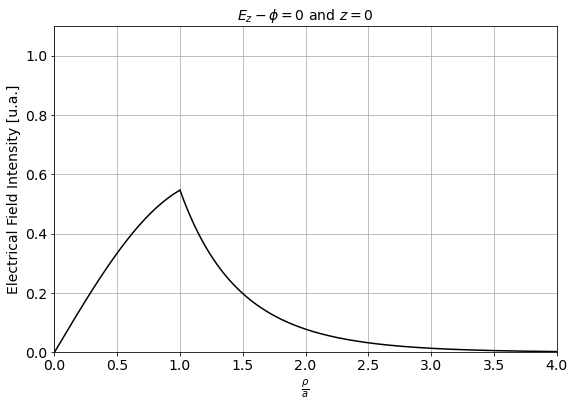

In [18]:
plt.figure(figsize=(9,6))
plt.plot(rho1/a, Ez1_0, 'k')
plt.plot(rho2/a, Ez2_0, 'k')
plt.grid(True)
plt.xlabel(r'$\frac{\rho}{a}$')
plt.xlim([0,4])
plt.ylabel('Electrical Field Intensity [u.a.]')
plt.title(r'$E_z - \phi = 0$ and $z = 0$')
plt.ylim([0,1.1])

No modo fundamental, a magnitude das componentes $E_z$ e $H_z$ são bem menores que das demais componentes de campo para $\left(n_2/n_1\right)^2 \approx 1$. Portanto, o modo HE11 é aproximadamente linearmente polarizado para fibras de fraco guiamento (*weakly guiding fibers*). Nesse caso, uma das componentes transversais é considerada nula. Por exemplo, caso $E_y = 0$, a componente $E_x$ do campo elétrico do modo HE11 é dada por

\begin{equation}
  E_x(\rho, m, z) = E_0 \begin{cases}
    \frac{J_0\left( p \rho \right)}{J_0 \left( pa \right)} e^{i \beta z}, & \rho \le a,\\
    \frac{K_0\left( q \rho \right)}{K_0 \left( qa \right)} e^{i \beta z}, & \rho > a.
  \end{cases}
\end{equation}

em que $E_0$ é uma constante relacionada com a potência do modo.

In [19]:
def ex_field_HE11_2D(x, pfac, qfac, beta, z, radius):
  if x.flatten()[0] < radius:
    return sp.jv(0, pfac*x)/sp.jv(0, pfac*radius)*np.exp(i*beta*z)
  else:
    return sp.kv(0, qfac*x)/sp.kv(0, qfac*radius)*np.exp(i*beta*z)

Text(0.5, 1.0, '$E_x - z = 0$')

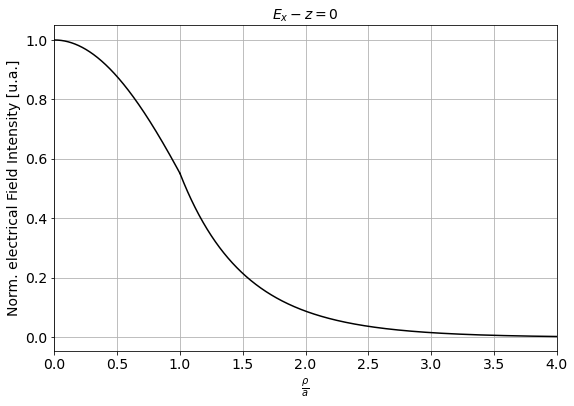

In [20]:
plt.figure(figsize=(9,6))
Ex1_HE11_2D = ex_field_HE11_2D(rho1, p_0, q_0, beta_0, 0, a)
Ex2_HE11_2D = ex_field_HE11_2D(rho2, p_0, q_0, beta_0, 0, a)
maxExField = np.max(Ex1_HE11_2D)
plt.plot(rho1/a, Ex1_HE11_2D/maxExField, 'k')
plt.plot(rho2/a, Ex2_HE11_2D/maxExField, 'k')
plt.grid(True)
plt.xlabel(r'$\frac{\rho}{a}$')
plt.xlim([0,4])
plt.ylabel('Norm. electrical Field Intensity [u.a.]')
plt.title(r'$E_x - z = 0$')

In [21]:
import matplotlib.cm as cm

def ex_field_HE11(x, pfac, qfac, beta, z, radius):
  Z = np.zeros(np.shape(x))
  idxLow  = (x < radius)
  idxHigh = (x >= radius)
  Z[idxLow]  = sp.jv(0, pfac*x[idxLow])/sp.jv(0, pfac*radius)*np.exp(i*beta*z)
  Z[idxHigh] = sp.kv(0, qfac*x[idxHigh])/sp.kv(0, qfac*radius)*np.exp(i*beta*z)
  return Z

Text(0.5, 0.92, '$E_x$ - $HE_{11}^x$ mode')

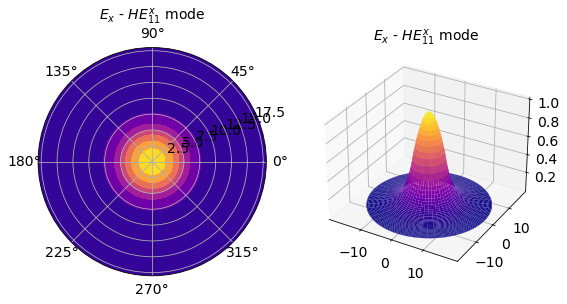

In [22]:
r = np.linspace(0, 4*a, 100)
theta  = np.linspace(0, 2*np.pi, 100)
R, THETA = np.meshgrid(r, theta)
X, Y = R*np.cos(THETA), R*np.sin(THETA)
Ex_HE11_P = ex_field_HE11(R, p_0, q_0, beta_0, 0, a)
maxEx_HE11_P = np.max(Ex_HE11_P)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(121,projection="polar")
ax1.contourf(THETA, 1e6*R, Ex_HE11_P/maxEx_HE11_P, cmap=plt.cm.plasma)
ax1.set_title('$E_x$ - $HE_{11}^x$ mode')
ax2 = fig.add_subplot(122,projection="3d")
ax2.plot_surface(1e6*X, 1e6*Y, Ex_HE11_P/maxEx_HE11_P, cmap=plt.cm.plasma)
ax2.set_title('$E_x$ - $HE_{11}^x$ mode')


A componente dominante do campo magnético correspondente é
\begin{equation}
H_y = n_2\sqrt{\frac{\varepsilon_0}{\mu_0}}E_x.
\end{equation}
Este modo é polarizado em $x$. A mesma fibra suporta outro modo linearmente polarizado na direção $y$. Assim, a fibra monomodo suporta dois modos ortogonais degenerados: HE$_{11}^x$ e HE$_{11}^y$.


## Spot size
É possível aproximar a distribuição da componente $E_x$ por um distribuição Gaussiana:
\begin{equation}
    E_x\left( \rho, z \right) = Ae^{-\left(\rho/\omega\right)^2}e^{j\beta z}
\end{equation}

em que $w$ é o raio do campo, também denominado *spot size*. Esse parâmetro varia com a frequência normalizada $V$ na região $1,2 < V < 2,4$ de acordo com
\begin{equation}
\frac{w}{a} \approx 0,65 + 1,619V^{-3/2} + 2.879V^{-6}
\end{equation}

In [23]:
def spotSize(radius, nrmFrq):
    return radius*(0.65+1.619*nrmFrq**(-1.5)+2.879*nrmFrq**(-6))

wnorm = spotSize(a, V)/a
print("V = %3.2f" %(V))
print(wnorm)

V = 2.08
1.224537971819236


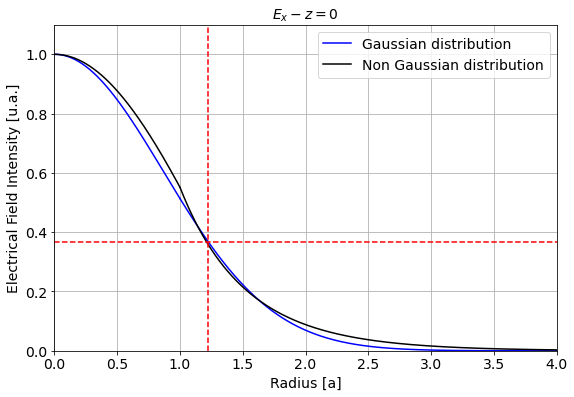

In [24]:
def ex_field_HE11_Gauss(rho, w):
    return np.exp(-(rho/w)**2)

Ex1G_HE11 = ex_field_HE11_Gauss(rho1, spotSize(a, V))
Ex2G_HE11 = ex_field_HE11_Gauss(rho2, spotSize(a, V))
plt.figure(figsize=(9,6))
plt.plot(rho1/a, Ex1G_HE11, 'b', label = 'Gaussian distribution')
plt.plot(rho2/a, Ex2G_HE11, 'b')

maxEx_HE11_2D = np.max(Ex1_HE11_2D)
plt.plot(rho1/a, Ex1_HE11_2D/maxEx_HE11_2D, 'k', label = "Non Gaussian distribution")
plt.plot(rho2/a, Ex2_HE11_2D/maxEx_HE11_2D, 'k')

plt.plot([wnorm,wnorm], [0,1.2], 'r--')
plt.plot([0,4], [1/np.exp(1),1/np.exp(1)], 'r--')

plt.xlim(0,4)
plt.ylim(0,1.1)

plt.grid(True)
plt.xlabel('Radius [a]')
plt.xlim([0,4])
plt.ylabel('Electrical Field Intensity [u.a.]')
plt.title(r'$E_x - z = 0$')
plt.legend(loc='upper right')

A partir do *spot size* é possível calcular a área efetiva do núcleo $A_{eff} = \pi w^2$. Esse é um importante parâmetro relacionado com os efeitos não lineares em fibras ópticas. Por fim, é possível estimar o fator de confinamento a partir da distribuição Gaussiana da componente $E_x$ como:
\begin{equation}
    \Gamma = \frac{P_{core}}{P_{total}} = \frac{\int_0^a |E_x|^2 \rho d\rho}{\int_0^\infty |E_x|^2 \rho d\rho} = 1 - e^{-2\left(\frac{a}{w} \right)^2}
\end{equation}

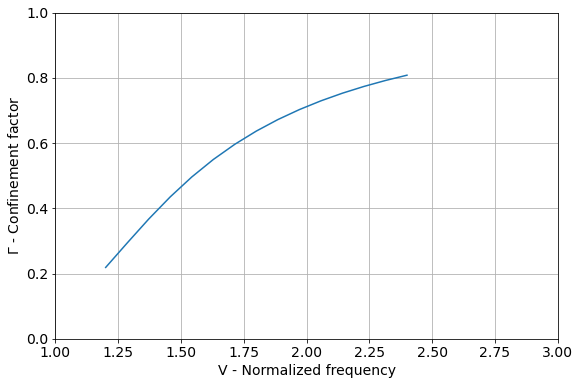

In [25]:
V_vec = np.linspace(1.2,2.4,15)
w_vec = spotSize(a, V_vec)
gamma = 1 - np.exp(-2*(a/w_vec)**2)
plt.figure(figsize=(9,6))
plt.plot(V_vec, gamma)
plt.xlabel('V - Normalized frequency')
plt.ylabel(r'$\Gamma$ - Confinement factor')
plt.xlim(1,3)
plt.ylim(0,1)
plt.grid(True)